In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams["figure.figsize"] = (20,10)

# Overview

In [2]:
df1 = pd.read_csv('/kaggle/input/real-estate-price-prediction/Real estate.csv')

In [3]:
df1.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df1.shape

(414, 8)

In [5]:
df2 = df1.drop(['No', 'X1 transaction date'], axis='columns')

In [6]:
df2.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


# Cleaning

In [7]:
df2.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [8]:
df2.loc[10]

X2 house age                               34.80000
X3 distance to the nearest MRT station    405.21340
X4 number of convenience stores             1.00000
X5 latitude                                24.97349
X6 longitude                              121.53372
Y house price of unit area                 41.40000
Name: 10, dtype: float64

In [9]:
df2[~(df2['X2 house age'] > 20)]

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
5,7.1,2175.03000,3,24.96305,121.51254,32.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


# Visualize

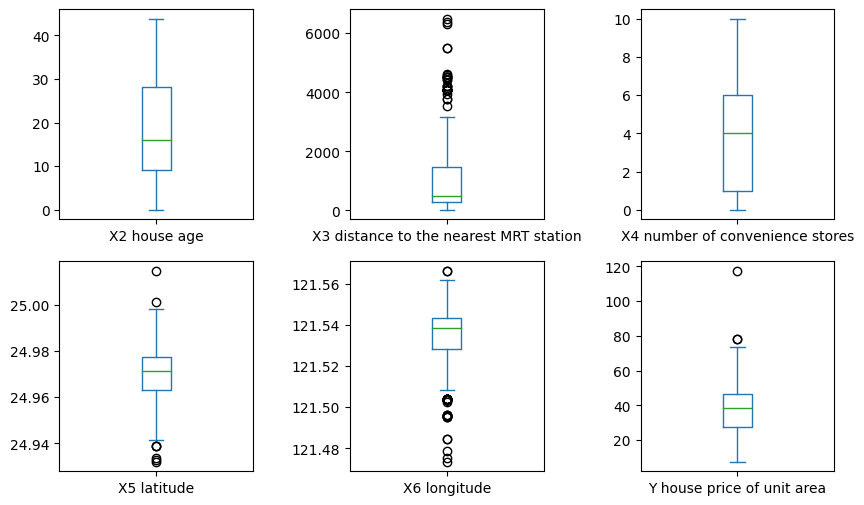

In [10]:
df2.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6),
    layout=(2, 3)
)
 
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

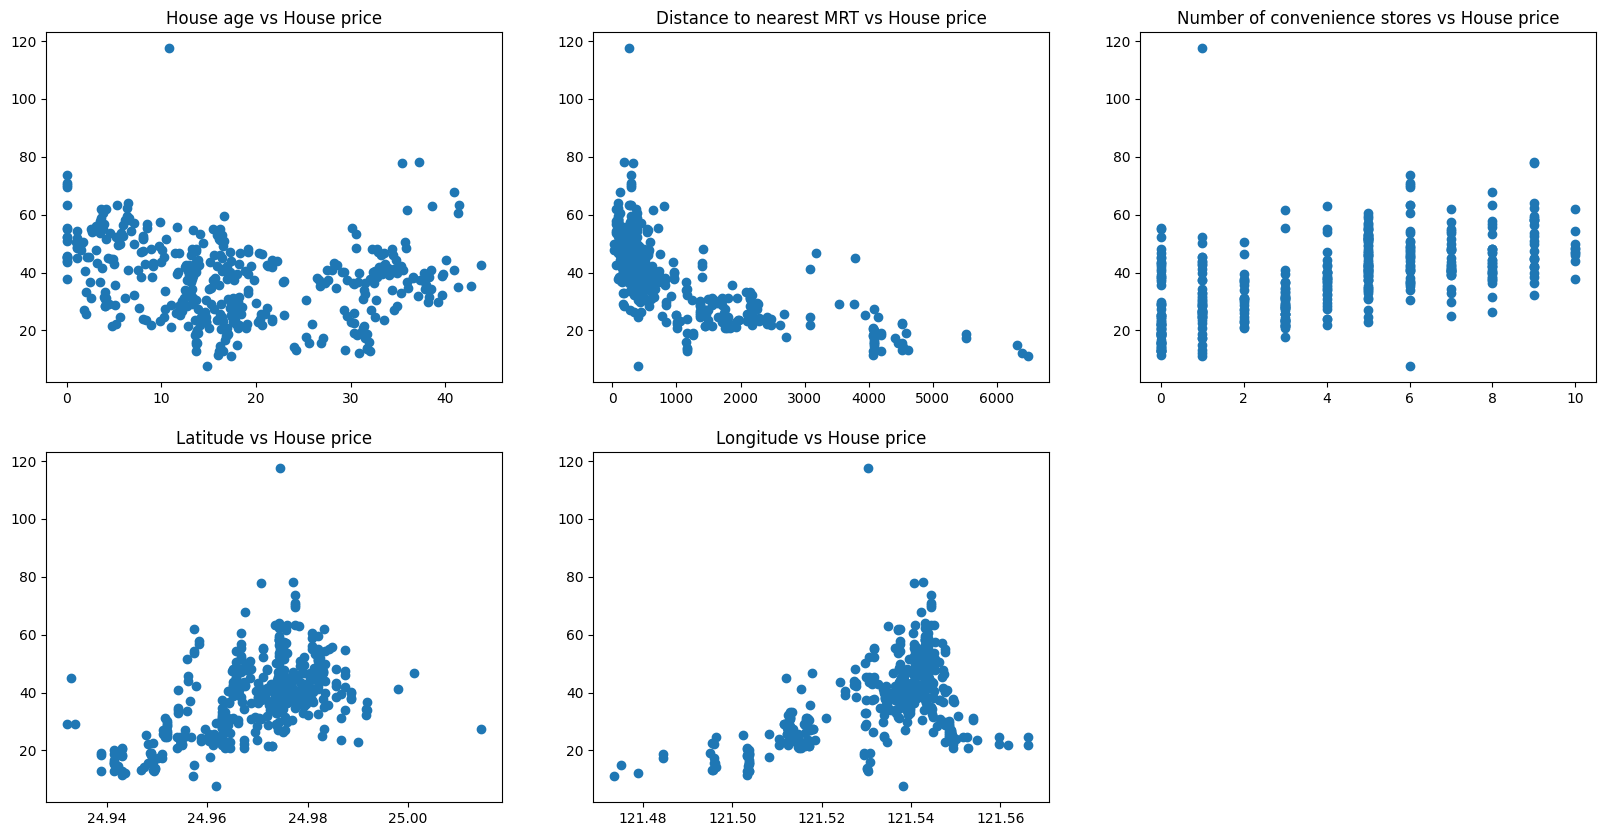

In [11]:
figure, axis = plt.subplots(2, 3) 
  
# For Sine Function 
axis[0, 0].scatter(df2['X2 house age'], df2['Y house price of unit area']) 
axis[0, 0].set_title("House age vs House price") 
  
axis[0, 1].scatter(df2['X3 distance to the nearest MRT station'], df2['Y house price of unit area']) 
axis[0, 1].set_title("Distance to nearest MRT vs House price") 

axis[0, 2].scatter(df2['X4 number of convenience stores'], df2['Y house price of unit area']) 
axis[0, 2].set_title("Number of convenience stores vs House price") 

axis[1, 0].scatter(df2['X5 latitude'], df2['Y house price of unit area']) 
axis[1, 0].set_title("Latitude vs House price") 

axis[1, 1].scatter(df2['X6 longitude'], df2['Y house price of unit area']) 
axis[1, 1].set_title("Longitude vs House price") 

figure.delaxes(axis[1, 2])


# Training

In [12]:
X = df2.drop('Y house price of unit area', axis='columns')
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [13]:
y = df2['Y house price of unit area']
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

### Multiple Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
lr_clf=  LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.606245741231465

In [16]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.64206915, 0.60817301, 0.42958141, 0.54223732, 0.61099613])

In [17]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'LinearRegression' : {
            'model' : LinearRegression(),
            'params' : {
                'fit_intercept': [True, False], 
                'positive': [True, False]
            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,LinearRegression,0.568233,"{'fit_intercept': False, 'positive': False}"
1,Lasso,0.537837,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.548978,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [18]:
def predict_price(age,dist_to_mrt,con_stores,lat, long):

    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = dist_to_mrt
    x[2] = con_stores
    x[3] = lat
    x[4] = long


    return lr_clf.predict([x])[0]

In [19]:
predict_price(10, 80, 5, 26, 121)

291.6398733395017

### Polynimial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Find the best degree for polynomial regressor
degrees = [2, 3, 4, 5, 6] # Change degree "hyperparameter" here
best_score = 0
best_degree = 0
for degree in degrees:
    
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(X_train)
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(X_train_poly, y_train)
    scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=5) # Change k-fold cv value here
    print(scores)
    if max(scores) > best_score:
        best_score = max(scores)
        best_degree = degree

[0.68319561 0.60164668 0.51552573 0.57883    0.69359204]
[ 0.68624648  0.72129322  0.38576358 -0.30036532  0.06273273]
[ 5.62662296e-01 -3.16780240e+01  1.14272731e-02  2.12910774e-01
 -8.85490730e-01]
[   0.58380934 -149.58249589  -18.06184667   -0.33774282  -62.23090582]
[  -2.21696298 -130.11032833 -452.55237993   -1.43716494  -23.02845818]


In [21]:
print('Best score:', best_score, 'Best degree:', best_degree)

Best score: 0.7212932205002645 Best degree: 3


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

best_poly_reg = LinearRegression()
best_poly_features = PolynomialFeatures(degree = best_degree)
best_X_train_poly = best_poly_features.fit_transform(X_train)
best_poly_reg.fit(best_X_train_poly, y_train)

y_train_predicted = best_poly_reg.predict(best_X_train_poly)
  
# predicting on test data-set
y_test_predict = best_poly_reg.predict(best_poly_features.fit_transform(X_test))

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 7.994133755824163
R2 score of training set is 0.6583360420323032


The model performance for the test set
-------------------------------------------
RMSE of test set is 8.197892629465239
R2 score of test set is 0.6075713521576707


In [23]:
cross_val_score(best_poly_reg, X, y)

array([0.68463546, 0.53209757, 0.66649314, 0.42112676, 0.57912236])

### Manually perform Multiple Linear Regression

#### Initialise weights and bias

In [24]:
def predict(x, w, b): 

    p = x.dot(w) + b     
    return p  

In [25]:
def compute_cost(X, y, w, b): 

    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = X.iloc[i].dot(w) + b           
        cost = cost + (f_wb_i - y.iloc[i])**2      
    cost = cost / (2 * m)                         
    return cost

In [26]:
def compute_gradient(X, y, w, b): 

    m,n = X.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (X.iloc[i].dot(w) + b) - y.iloc[i]  
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X.iloc[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw


# 

In [27]:
import copy, math

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        
        dj_db,dj_dw = gradient_function(X, y, w, b)   

        
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        
        if i<100000:      
            J_history.append( cost_function(X, y, w, b))

        
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history 


### Train the model using manual implementation

In [28]:
rng = np.random.default_rng(seed=42)
m, n = X.shape
initial_w = rng.random(n)
initial_b = 0
iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {predict(X_train.iloc[i], w_final, b_final)}, target value: {y_train.iloc[i]}")

Iteration    0: Cost 64880.82   
Iteration  100: Cost   106.45   
Iteration  200: Cost   105.71   
Iteration  300: Cost   104.98   
Iteration  400: Cost   104.27   
Iteration  500: Cost   103.57   
Iteration  600: Cost   102.88   
Iteration  700: Cost   102.19   
Iteration  800: Cost   101.52   
Iteration  900: Cost   100.85   
b,w found by gradient descent: -0.00,[ 0.71307342 -0.00602128  0.85914664  0.69571784  0.0860902 ] 
prediction: 44.6413965316203, target value: 27.0
prediction: 36.72790219330445, target value: 32.9
prediction: 63.13501156139361, target value: 67.7
prediction: 26.71893765001491, target value: 55.3
prediction: 34.31442463833278, target value: 25.3
prediction: 37.8726665693632, target value: 33.6
prediction: 41.73557427634067, target value: 42.1
prediction: 25.892294409521856, target value: 42.3
prediction: 25.72312789761099, target value: 48.0
prediction: 36.95155838043475, target value: 23.1
prediction: 56.415964279667655, target value: 39.4
prediction: 58.38444

### Initialise weights as 0's to see if it helps

In [29]:
initial_w = np.zeros(n)

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape

train_predictions = []
for i in range(m):
    prediction = predict(X_train.iloc[i], w_final, b_final)
    print(f"prediction: {prediction}, target value: {y_train.iloc[i]}")
    train_predictions.append(prediction)


Iteration    0: Cost   671.81   
Iteration  100: Cost   289.24   
Iteration  200: Cost   148.65   
Iteration  300: Cost    91.85   
Iteration  400: Cost    68.88   
Iteration  500: Cost    59.57   
Iteration  600: Cost    55.78   
Iteration  700: Cost    54.21   
Iteration  800: Cost    53.55   
Iteration  900: Cost    53.25   
b,w found by gradient descent: 0.00,[ 0.0337295  -0.0067722   0.0195751   0.07152762  0.34802678] 
prediction: 35.479647217040686, target value: 27.0
prediction: 43.380604679814205, target value: 32.9
prediction: 44.79618643119114, target value: 67.7
prediction: 42.8295062021915, target value: 55.3
prediction: 37.937580117662044, target value: 25.3
prediction: 42.663267517209555, target value: 33.6
prediction: 42.76496302078309, target value: 42.1
prediction: 34.897093148908034, target value: 42.3
prediction: 34.86045065324164, target value: 48.0
prediction: 37.677551906183055, target value: 23.1
prediction: 44.018050368411856, target value: 39.4
prediction: 44.

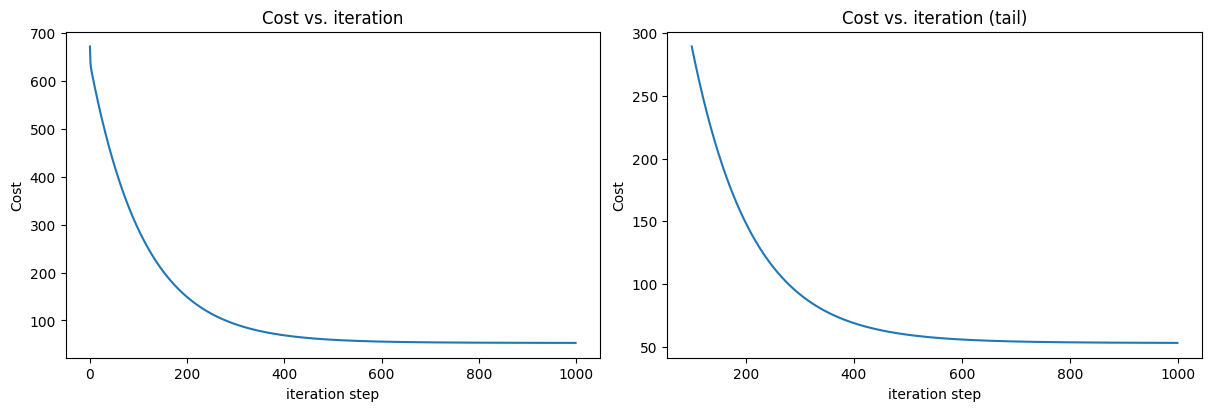

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

### Get predictiosn for test data

In [31]:
m = X_test.shape[0]
test_predictions = []
for i in range(m):
    prediction = predict(X_test.iloc[i], w_final, b_final)
    print(f"prediction: {prediction}, target value: {y_test.iloc[i]}")
    test_predictions.append(prediction)

prediction: 17.024911303784396, target value: 14.7
prediction: 43.2698315777835, target value: 33.1
prediction: 42.84623181885211, target value: 42.2
prediction: 42.46591041477548, target value: 36.3
prediction: 43.95542955381741, target value: 54.4
prediction: 17.103700763359473, target value: 20.7
prediction: 42.8295062021915, target value: 55.2
prediction: 43.872302312099336, target value: 63.9
prediction: 42.864205235304176, target value: 41.9
prediction: 35.30292227949365, target value: 28.9
prediction: 29.50658216208047, target value: 28.6
prediction: 33.70062280611905, target value: 31.1
prediction: 42.84034365866091, target value: 35.1
prediction: 42.055872646327416, target value: 42.5
prediction: 16.106694822290834, target value: 19.2
prediction: 42.78857366789242, target value: 59.6
prediction: 26.640400209788975, target value: 25.7
prediction: 42.8295062021915, target value: 52.2
prediction: 34.31794707762614, target value: 25.6
prediction: 42.62803936951744, target value: 6

### Calculate scores on training and testing data using RMSE and R2

In [32]:
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, y_train_predicted)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))
r2_test = r2_score(y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 10.304832250175698
R2 score of training set is 0.6583360420323032


The model performance for the test set
-------------------------------------------
RMSE of test set is 9.619289091660406
R2 score of test set is 0.6075713521576707
